# All Imports for the script

In [1]:
import h2o
import seaborn as sns
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# CONSTANT DECLARATIONS
NYC_WEATHER_DATA_PATH = "C://repository/h2o_project/h2o_data/31081_New_York_City__Hourly_2013.csv"

## Initiating h2o instance

In [3]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.201-b09, mixed mode)
  Starting server from c:\programdata\miniconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\retim\AppData\Local\Temp\tmpuys4xf6z
  JVM stdout: C:\Users\retim\AppData\Local\Temp\tmpuys4xf6z\h2o_retim_started_from_python.out
  JVM stderr: C:\Users\retim\AppData\Local\Temp\tmpuys4xf6z\h2o_retim_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,01 secs
H2O cluster timezone:,America/Denver
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.1
H2O cluster version age:,19 days
H2O cluster name:,H2O_from_python_retim_3dqdn8
H2O cluster total nodes:,1
H2O cluster free memory:,247.5 Mb
H2O cluster total cores:,6
H2O cluster allowed cores:,6
H2O cluster status:,"accepting new members, healthy"


## 1. Import the data.

In [4]:
nyc_df = h2o.import_file(NYC_WEATHER_DATA_PATH)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [5]:
nyc_df.head(5)

Year Local,Month Local,Day Local,Hour Local,Year UTC,Month UTC,Day UTC,Hour UTC,Cavok Reported,Cloud Ceiling (m),Cloud Cover Fraction,Cloud Cover Fraction 1,Cloud Cover Fraction 2,Cloud Cover Fraction 3,Cloud Cover Fraction 4,Cloud Cover Fraction 5,Cloud Cover Fraction 6,Cloud Height (m) 1,Cloud Height (m) 2,Cloud Height (m) 3,Cloud Height (m) 4,Cloud Height (m) 5,Cloud Height (m) 6,Dew Point (C),Humidity Fraction,Precipitation One Hour (mm),Pressure Altimeter (mbar),Pressure Sea Level (mbar),Pressure Station (mbar),Snow Depth (cm),Temperature (C),Visibility (km),Weather Code 1,Weather Code 1/ Description,Weather Code 2,Weather Code 2/ Description,Weather Code 3,Weather Code 3/ Description,Weather Code 4,Weather Code 4/ Description,Weather Code 5,Weather Code 5/ Description,Weather Code 6,Weather Code 6/ Description,Weather Code Most Severe / Icon Code,Weather Code Most Severe,Weather Code Most Severe / Description,Wind Direction (degrees),Wind Gust (m/s),Wind Speed (m/s)
2013,1,1,0,2013,1,1,5,0,2895.6,1,0.9,1,nan,nan,nan,nan,2895.6,3352.8,nan,nan,nan,nan,-5,0.5447,nan,1013.09,nan,nan,nan,3.3,16.0934,nan,,nan,,nan,,nan,,nan,,nan,,0,nan,,nan,nan,2.57
2013,1,1,1,2013,1,1,6,0,3048,1,1,nan,nan,nan,nan,nan,3048,nan,nan,nan,nan,nan,-4.4,0.5463,nan,1012.08,nan,nan,nan,3.9,16.0934,nan,,nan,,nan,,nan,,nan,,nan,,0,nan,,260,9.77,4.63
2013,1,1,2,2013,1,1,7,0,1828.8,1,1,nan,nan,nan,nan,nan,1828.8,nan,nan,nan,nan,nan,-3.3,0.619,nan,1012.41,nan,nan,nan,3.3,16.0934,nan,,nan,,nan,,nan,,nan,,nan,,0,nan,,nan,7.72,1.54
2013,1,1,3,2013,1,1,8,0,1463,1,1,nan,nan,nan,nan,nan,1463.04,nan,nan,nan,nan,nan,-2.8,0.6159,nan,1012.41,nan,nan,nan,3.9,16.0934,nan,,nan,,nan,,nan,,nan,,nan,,0,nan,,nan,nan,3.09
2013,1,1,4,2013,1,1,9,0,1402.1,1,1,nan,nan,nan,nan,nan,1402.08,nan,nan,nan,nan,nan,-2.8,0.6159,nan,1012.75,nan,nan,nan,3.9,16.0934,nan,,nan,,nan,,nan,,nan,,nan,,0,nan,,260,nan,4.12


In [6]:
nyc_df.describe()

Rows:8760
Cols:50




,Year Local,Month Local,Day Local,Hour Local,Year UTC,Month UTC,Day UTC,Hour UTC,Cavok Reported,Cloud Ceiling (m),Cloud Cover Fraction,Cloud Cover Fraction 1,Cloud Cover Fraction 2,Cloud Cover Fraction 3,Cloud Cover Fraction 4,Cloud Cover Fraction 5,Cloud Cover Fraction 6,Cloud Height (m) 1,Cloud Height (m) 2,Cloud Height (m) 3,Cloud Height (m) 4,Cloud Height (m) 5,Cloud Height (m) 6,Dew Point (C),Humidity Fraction,Precipitation One Hour (mm),Pressure Altimeter (mbar),Pressure Sea Level (mbar),Pressure Station (mbar),Snow Depth (cm),Temperature (C),Visibility (km),Weather Code 1,Weather Code 1/ Description,Weather Code 2,Weather Code 2/ Description,Weather Code 3,Weather Code 3/ Description,Weather Code 4,Weather Code 4/ Description,Weather Code 5,Weather Code 5/ Description,Weather Code 6,Weather Code 6/ Description,Weather Code Most Severe / Icon Code,Weather Code Most Severe,Weather Code Most Severe / Description,Wind Direction (degrees),Wind Gust (m/s),Wind Speed (m/s)
type,int,int,int,int,int,int,int,int,int,real,real,real,real,real,int,int,int,real,real,real,int,int,int,real,real,real,real,int,int,int,real,real,int,enum,int,enum,int,enum,int,enum,int,enum,int,enum,int,int,enum,int,real,real
mins,2013.0,1.0,1.0,0.0,2013.0,1.0,1.0,0.0,0.0,61.0,0.0,0.0,0.25,0.5,NaN,NaN,NaN,60.96,243.84,426.72,NaN,NaN,NaN,-22.2,0.1495,0.0,984.6493,NaN,NaN,NaN,-11.7,0.4023,1.0,,1.0,,1.0,,1.0,,1.0,,3.0,,0.0,1.0,,10.0,7.2,0.0
mean,2013.0,6.526027397260273,15.720547945205485,11.5,2013.0005707762557,6.525114155251141,15.72134703196347,11.500114155251142,0.0,1313.0120192307693,0.4070815204946187,0.3495019464163041,0.8652571041948579,0.9587209302325581,0.0,0.0,0.0,1289.618551531574,1647.7553803112314,2109.086024612403,0.0,0.0,0.0,4.808721529128993,0.6071889321277327,1.3140266666666667,1018.1397621380335,0.0,0.0,0.0,12.802312006409524,14.32659931326542,5.036226415094339,,4.1160541586073505,,3.4972067039106145,,2.4901960784313726,,2.3333333333333335,,3.0,,1.5283105022831054,5.036226415094339,,199.22801147227537,9.496722017220172,2.4395916636374646
maxs,2013.0,12.0,31.0,23.0,2014.0,12.0,31.0,23.0,0.0,3657.6,1.0,1.0,1.0,1.0,NaN,NaN,NaN,3657.5999,3657.5999,3657.5999,NaN,NaN,NaN,24.4,1.0,26.924,1042.2113,NaN,NaN,NaN,36.1,16.0934,40.0,,60.0,,36.0,,27.0,,3.0,,3.0,,16.0,40.0,,360.0,20.58,10.8
sigma,0.0,3.448048134069242,8.796749115212307,6.922581688234342,0.023885468333800577,3.447922461212308,8.795911359231582,6.922499226031305,0.0,983.9837834758466,0.45926278654609204,0.4216067391151353,0.20212723206448138,0.10097347353236512,-0.0,-0.0,-0.0,941.0299969649624,898.3293913238305,907.4522018513926,-0.0,-0.0,-0.0,10.86120854804035,0.18395622492861766,2.610103969425827,7.438238180444406,-0.0,-0.0,-0.0,9.88983916182101,3.6247880002764012,5.388407968229686,,7.032184696768442,,6.846121104401717,,3.9767954386395474,,1.0,,0.0,,4.313295569050784,5.388407968229686,,104.09521202667847,1.9043598606843488,1.6281704566349176
zeros,0,0,0,365,0,0,0,365,8737,0,4508,4508,0,0,0,0,0,0,0,0,0,0,0,138,0,272,0,0,0,0,136,0,0,,0,,0,,0,,0,,0,,7435,0,,0,0,1340
missing,0,0,0,0,0,0,0,0,23,5432,26,26,7282,8244,8760,8760,8760,4516,7282,8244,8760,8760,8760,23,23,7860,23,8760,8760,8760,23,23,7435,7435,8243,8243,8581,8581,8709,8709,8751,8751,8758,8758,0,7435,7435,4576,7134,507
0,2013.0,1.0,1.0,0.0,2013.0,1.0,1.0,5.0,0.0,2895.6,1.0,0.9,1.0,nan,nan,nan,nan,2895.5999,3352.8,nan,nan,nan,nan,-5.0,0.5447,nan,1013.0917,nan,nan,nan,3.3,16.0934,nan,,nan,,nan,,nan,,nan,,nan,,0.0,nan,,nan,nan,2.57
1,2013.0,1.0,1.0,1.0,2013.0,1.0,1.0,6.0,0.0,3048.0,1.0,1.0,nan,nan,nan,nan,nan,3048.0,nan,nan,nan,nan,nan,-4.4,0.5463,nan,1012.0759,nan,nan,nan,3.9,16.0934,nan,,nan,,nan,,nan,,nan,,nan,,0.0,nan,,260.0,9.77,4.63
2,2013.0,1.0,1.0,2.0,2013.0,1.0,1.0,7.0,0.0,1828.8,1.0,1.0,nan,nan,nan,nan,nan,1828.7999,nan,nan,nan,nan,nan,-3.3,0.619,nan,1012.4145,nan,nan,nan,3.3,16.0934,nan,,nan,,nan,,nan,,nan,,nan,,0.0,nan,,nan,7.72,1.54


In [39]:
nyc_df['Month Local'].table()

Month Local,Count
1,744
2,672
3,744
4,720
5,744
6,720
7,744
8,744
9,720
10,744


In [16]:
## wanted to filter all empty columns 

empty = [x for x in nyc_df.columns if len(nyc_df[nyc_df[x].isna()]) == nyc_df.shape[0]]
empty

['Cloud Cover Fraction 4',
 'Cloud Cover Fraction 5',
 'Cloud Cover Fraction 6',
 'Cloud Height (m) 4',
 'Cloud Height (m) 5',
 'Cloud Height (m) 6',
 'Pressure Sea Level (mbar)',
 'Pressure Station (mbar)',
 'Snow Depth (cm)']

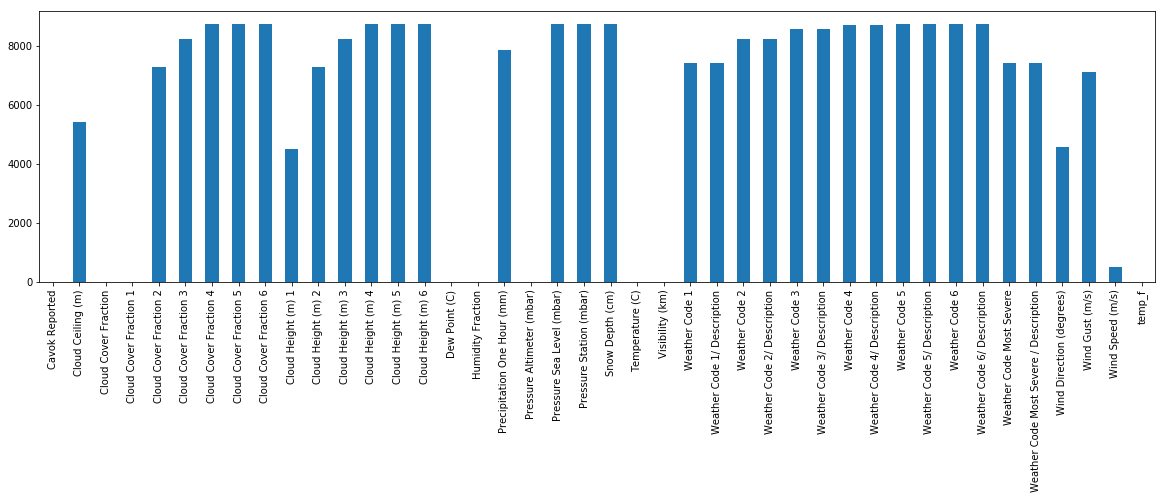

In [35]:
train = nyc_df.as_data_frame()
null_columns=train.columns[train.isnull().any()]
null_col =train[null_columns].isnull().sum()
null_col.plot(kind = "bar", figsize = (20,5))
plt.show()

## 2. Run columnar transformation on Column 

#### 3. Append the column back to the original frame, call the column temp_f.

In [23]:
# applying the transformation on each row for 'Temperature (C)' column to create new column "temp_f" which is temperature convertion from C to F
# appending new column to the data frame itself

nyc_df['temp_f'] = nyc_df['Temperature (C)'].apply(lambda x: x * 1.8 + 32)

In [24]:
## uncomment the code below to see the full data frame

#nyc_df.head(5)

In [25]:
## code below just filter two columns from dataframe to show the transformation was made correctly

nyc_df[['Temperature (C)','temp_f']].tail(5)

Temperature (C),temp_f
0,32
-1.1,30.02
-1.1,30.02
-2.2,28.04
-2.8,26.96


### 4. Group by the month and day and aggregate to find the low, high, and average temperature every day in 2013.

In [32]:
cols_to_group = ['Month Local', 'Day Local']

"""
noticed that some days were nan hence went and investigated 
the data frame and noticed few rows, 1 hr a day has "na" which can be dropped 
to get average of the day, hence use 'rm' as option to remove
na in each hour of the day temperature

"""
nyc_change_with_na = nyc_df.group_by(by=cols_to_group).count(na="all").min('Temperature (C)')\
            .max('Temperature (C)').mean('Temperature (C)').get_frame()

In [61]:
nyc_df_hourly = nyc_df[['Month Local', 'Day Local','Hour Local','Temperature (C)']]
any_nan_df = nyc_df_hourly[nyc_df_hourly['Month Local'].isna()|
                                nyc_df_hourly['Day Local'].isna()|
                                nyc_df_hourly['Hour Local'].isna()|
                                  nyc_df_hourly['Temperature (C)'].isna()]
any_nan_df.head(23)

Month Local,Day Local,Hour Local,Temperature (C)
1,2,3,nan
2,6,1,nan
2,6,3,nan
3,9,1,nan
3,10,3,nan
3,12,8,nan
3,25,23,nan
6,1,16,nan
8,15,20,nan
8,16,5,nan


In [74]:
any_nan_df[['Month Local', 'Day Local']].table().head(23)

Month Local,Day Local,Counts
1,2,1
2,6,2
3,9,1
3,10,1
3,12,1
3,25,1
6,1,1
8,15,1
8,16,1
8,19,1


In [13]:
#checking nans columns 

nan_df = nyc_change_with_na.isna()

print ("Number of nan rows: {} ".format(*(nan_df[nan_df['isNA(min_Temperature (C))']==1].shape)))

Number of nan rows: 19 


### filter "nan" from data frame and geting the stat on each column

In [14]:
# data cleaning removing "nan" to get means for days temperature.
nyc_change = nyc_df.group_by(by=cols_to_group).count(na="all").min('Temperature (C)',na="rm")\
            .max('Temperature (C)',na ='rm').mean('Temperature (C)', na='rm').get_frame()

In [15]:
nyc_change.head(5)

Month Local,Day Local,nrow,min_Temperature (C),max_Temperature (C),mean_Temperature (C)
1,1,24,-2.8,3.9,2.5
1,2,24,-5.6,0,-2.58696
1,3,24,-4.4,0,-1.92917
1,4,24,-0.6,2.8,1.12917
1,5,24,0,5.6,2.47917


# Visualization: the average temperature each day of the year using plots.

In [17]:
# changing the h2oframe to pandas for visualization purpose
temp = nyc_change.as_data_frame()

In [18]:
# to create day and month column for proper label on the plot
temp['date_col'] = temp.apply(lambda x: dt.date(2013, int(x['Month Local']), int(x['Day Local'])), axis=1)

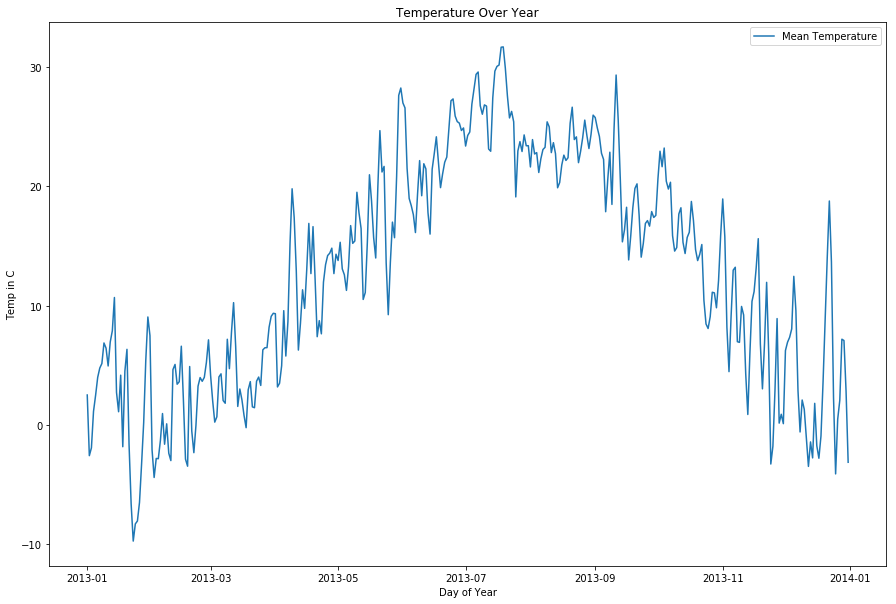

In [19]:
# values to be plotted
vals = temp['mean_Temperature (C)']

# created column that are labelled on x-axis
axis = temp['date_col']

# get optimal size of the plot for proper visibility
fig, ax = plt.subplots(figsize=(15, 10))

# display box to define the y axis plot 
ax.plot(axis, vals, label="Mean Temperature")

# displays x axis label on the plot
ax.set_xlabel('Day of Year')

# displays y axis label on the plot
ax.set_ylabel('Temp in C')

# labelling of the plot
ax.set_title('Temperature Over Year')
#ax.set_xticks( )
#ax.set_xticklabels( )
ax.legend();

# Filter or query the data to answer the following two questions

### What month/day was the coldest in NYC (use min temp)?

In [20]:
print("Coldest Day in NewYork: ")

print (nyc_change[nyc_change['min_Temperature (C)'] == nyc_change['min_Temperature (C)'].min()])

Coldest Day in NewYork: 


Month Local,Day Local,nrow,min_Temperature (C),max_Temperature (C),mean_Temperature (C)
1,23,24,-11.7,-7.2,-9.75


### What month/day was the hottest in NYC (use max temp)

In [21]:
print("hottest Day in NewYork: ")

print (nyc_change[nyc_change['min_Temperature (C)'] == nyc_change['min_Temperature (C)'].max()])

hottest Day in NewYork: 


Month Local,Day Local,nrow,min_Temperature (C),max_Temperature (C),mean_Temperature (C)
7,19,24,28.3,35,31.6875


In [1]:
#h2o.cluster().shutdown()